https://oeis.org/A354914

In [ ]:
from itertools import combinations_with_replacement, combinations

def compute_s(n):
    memo = set()
    mincost = [10000,]

    def naive_rec(target, s = [1,2], cost = 1):
        if s[-1] == target:
            tt = cost+1
            if tt < mincost[0]:
                mincost[0] = tt
                #print(s, a)
                # print(tt)
            return 

        if cost >= mincost[0]:
            return
        for t in combinations_with_replacement(s[::-1], 2):

            a = t[0] + t[1]
            b = t[0] * t[1]

            if b == target:
                if cost < mincost[0]:
                    mincost[0] = cost
                    # print(s, b)
                    # print(cost)
                return 

            if a == target:
                tt = cost+1
                if tt < mincost[0]:
                    mincost[0] = tt
                    #print(s, a)
                    # print(tt)
                return 

            if b not in s and b < target:
                temp_s = s.copy()
                temp_s.append(b)
                temp_s = sorted(temp_s)
                if str(temp_s) + str(cost) not in memo:
                    memo.add(str(temp_s)+ str(cost))
                    naive_rec(target, temp_s, cost)

            if a not in s and a < target:
                temp_s = s.copy()
                temp_s.append(a)
                if str(sorted(temp_s))+ str(cost) not in memo:
                    memo.add(str(sorted(temp_s))+ str(cost + 1))
                    naive_rec(target, temp_s, cost + 1)
    naive_rec(n)
    return mincost[0]

terms = []
for i in range(2, 400):
    k = compute_s(i)
    print(k, end = ', ')
    terms.append(k)

2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 

KeyboardInterrupt: ignored

In [ ]:
cc = [1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2]
t2 = terms.copy()

for i in range(len(terms)):
    t2[i] = t2[i] - cc[i]

print(t2)


[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from itertools import combinations_with_replacement
memo = set()
mincost = [10000,]
def naive_rec(target, s = [1,2,], cost = 1):
    #print(s)
    if cost > mincost[0]:
        return

    additions = []
    products = []

    for t in combinations_with_replacement(s[::-1], 2):
        a = t[0] + t[1]
        b = t[0] * t[1]

        if b == target:
            if cost < mincost[0]:
                mincost[0] = cost
                print(s, b)
                print(cost)
            return 

        if a<target: additions.append(a)
        if b<target: products.append(a)

    additions = set(additions)
    products = set(products) - set(s)
    additions = (additions - products) - set(s)
    print(additions)

    for p in products:
        temp_s = s.copy()
        temp_s.append(p)
        temp_s = sorted(temp_s)
        if str(temp_s) + str(cost) not in memo:
            memo.add(str(temp_s) + str(cost))
            naive_rec(target, temp_s, cost)
    
    for a in additions:
        # if a == target:
        #     if cost+1 < mincost[0]:
        #         mincost[0] = cost+1
        #         print(s, b)
        #         print(cost+1)
        #         return 

        temp_s = s.copy()
        temp_s.append(a)
        temp_s = sorted(temp_s)
        if str(temp_s) + str(cost+1) not in memo:
            memo.add(str(temp_s) + str(cost+1))
            naive_rec(target, temp_s, cost+1)
        
print(naive_rec(23))


In [ ]:
from sympy import divisors
s = [1,] + [0,] + [0,]*1000

for i in range(1, len(s)):
    r = [s[d] + s[i//d]  for d in divisors(i)[1:] if s[d] != 0 and s[i//d] != 0]
    a = [s[d] + s[i - d] + 1 for d in range(1, 1 + i//2) if s[d] != 0 and s[i - d] != 0]

    if len(r) != 0:
        prod_d = min(r)
        add_d =  min(a)
        s[i] = min(prod_d, add_d)
    else:
        s[i] = s[i-1]+1

print(s)

[1, 2, 3, 4, 6, 7, 7, 8, 9, 8, 10, 11, 10, 11, 11, 11, 12, 13, 11, 12, 13, 12, 14, 15, 13, 14, 14, 12, 14, 15, 14, 15, 15, 15, 16, 15, 14, 15, 15, 15, 16, 17, 15, 16, 17, 15, 18, 19, 16, 16, 17, 17, 17, 18, 15, 18, 17, 16, 18, 19, 17, 18, 18, 16, 18, 18, 18, 19, 19, 19, 18, 19, 17, 18, 18, 18, 18, 19, 18, 19, 19, 16, 19, 20, 18, 20, 19, 19, 20, 21, 18, 19, 21, 19, 22, 19, 19, 20, 19, 19, 20, 21, 20, 21, 20, 19, 21, 22, 18, 19, 21, 19, 20, 21, 19, 22, 21, 19, 22, 21, 20, 22, 21, 21, 21, 21, 19, 20, 21, 20, 21, 22, 21, 20, 22, 19, 22, 23, 22, 23, 21, 23, 22, 22, 20, 22, 21, 20, 21, 22, 21, 22, 21, 21, 22, 22, 21, 22, 22, 22, 22, 23, 19, 20, 22, 22, 23, 24, 21, 22, 23, 20, 22, 23, 22, 22, 23, 23, 24, 25, 21, 22, 22, 22, 24, 22, 22, 24, 25, 20, 22, 23, 22, 23, 23, 22, 22, 23, 22, 23, 23, 23, 24, 23, 23, 24, 24, 23, 23, 23, 22, 23, 24, 23, 25, 23, 21, 23, 22, 22, 24, 24, 22, 23, 23, 22, 24, 25, 22, 23, 25, 23, 24, 25, 22, 25, 25, 23, 24, 25, 23, 24, 25, 20, 23, 23, 23, 23, 24, 24, 24, 25, 2

In [ ]:
from sympy import divisors
s = [0,] + [0,] + [0,]*1000

for i in range(2, len(s)):
    #r = [s[d] + s[i//d] if s[d] != 0 and s[i//d] != 0 and else  for d in divisors(i)[1:]]

    r = []
    for d in divisors(i)[1:]:
        if d == i//d and s[d] != 0:
            r.append(s[d])
        elif s[d] != 0 and s[i//d] != 0:
            r.append(s[d] + s[i//d])

    a = [min(s[d], s[i - d]) + 1 for d in range(0, i) if s[d] != 0 and s[i - d] != 0]
    m_a = min(a)

    if len(r)==0:
        s[i] = m_a
    else:
        prod_d = min(r)
        s[i] = min(m_a, prod_d)

print(s)

ValueError: ignored

In [ ]:
def print_m(M):
    print('[' + ',\n '.join(map(str, M)) + ']\n' )

print_m([[1,2], [2,3]])

[[1, 2],
 [2, 3]]



In [ ]:
from itertools import combinations_with_replacement, combinations

def add_mult_chain(n, cost_add, cost_mult):
    memo = set()
    mincost = [100000,]
    usage  = [0,]
    def naive_rec(target, s = [1,], cost = 0):
        if cost >= mincost[0]:
            return
        adds = []
        mults = []
        for t in combinations_with_replacement(s[::-1], 2):
            a = t[0] + t[1]
            b = t[0] * t[1]
            adds.append(a)
            mults.append(b)

        adds = set(adds) - set(s)
        mults = set(mults) - set(s)

        if cost_mult< cost_add:
            for b in mults:
                if b == target:
                    tt = cost+cost_mult
                    if tt < mincost[0]:
                        mincost[0] = tt
                    return 
            for a in adds:
                if a == target:
                    tt = cost+cost_add
                    if tt < mincost[0]:
                        mincost[0] = tt
                    return 
        else:
            for a in adds:
                if a == target:
                    tt = cost+cost_add
                    if tt < mincost[0]:
                        mincost[0] = tt
                    return
            for b in mults:
                if b == target:
                    tt = cost+cost_mult
                    if tt < mincost[0]:
                        mincost[0] = tt
                    return 
        
        if cost+cost_mult < mincost[0]:
            for b in mults: 
                if b not in s and b < target:
                    temp_s = s.copy()
                    temp_s.append(b)
                    if str(sorted(temp_s))+ str(cost + cost_mult) not in memo:
                        memo.add(str(sorted(temp_s))+ str(cost + cost_mult))
                        naive_rec(target, temp_s, cost + cost_mult)


                        
        if cost+cost_add < mincost[0]:
            for a in adds:
                if a not in s and a < target:
                    temp_s = s.copy()
                    temp_s.append(a)
                    if str(sorted(temp_s))+ str(cost+cost_add) not in memo:
                        memo.add(str(sorted(temp_s))+ str(cost + cost_add))
                        naive_rec(target, temp_s, cost + cost_add) 

    naive_rec(n)
    return mincost[0]

terms = [0,]
print(0, end = ', ')
for i in range(2, 100):
    hh = add_mult_chain(i,1,1)
    print(hh, end = ', ')
    terms.append(hh)

# from tqdm import tqdm
# m_terms = []
# iters = 10
# targ = 37
# for a in tqdm(range(0, iters)):
#     tempa = []
#     for m in range(0, iters):
#         tempa.append(compute_s(targ,m,a,))
#     m_terms.append(tempa.copy())


# print_m(m_terms)
# print(max(max(i) for i in m_terms ))


0, 1, 2, 2, 3, 3, 4, 3, 3, 4, 4, 4, 5, 5, 4, 3, 4, 4, 5, 4, 5, 5, 6, 4, 4, 5, 4, 5, 5, 5, 6, 4, 5, 5, 5, 4, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 7, 5, 4, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 7, 5, 6, 6, 5, 

In [ ]:
cc = [1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2]
t2 = terms.copy()

for i in range(len(terms)):
    t2[i] = t2[i] - cc[i]

print(t2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
termm = m_terms
out = []
for i in range(1, len(termm)):
    term_arr = []
    for j in range(len(termm)):
        term_arr.append(termm[i][j] - termm[i-1][j])
    out.append(term_arr.copy())
print_m(out)



[[0, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [0, 1, 2, 2, 2, 2, 2, 2, 2, 2],
 [0, 1, 1, 2, 2, 2, 2, 2, 2, 2],
 [0, 0, 1, 1, 2, 2, 2, 2, 2, 2],
 [0, 0, 1, 1, 1, 2, 2, 2, 2, 2],
 [0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
 [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 [0, 0, 0, 1, 1, 1, 1, 1, 2, 2],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 2]]



In [ ]:
a = 942930490328
a.bit_length()

40

In [ ]:
from itertools import combinations_with_replacement
from math import log2
def calc_add_mult_n_n2(n):
    memo = set()
    mincost = [100000,]
    mins = []

    def naive_rec(target, s = [1,], cost = 0):
        if cost >= mincost[0]:
            return
        additions = []
        products = []
        for t in combinations_with_replacement(s[::-1], 2):
            bit_l = max(t[0].bit_length(), t[1].bit_length())
            a = t[0] + t[1]
            b = t[0] * t[1]
            if a<=target: additions.append((a, bit_l))
            if b<=target: products.append((b, bit_l*bit_l))

        additions =[i for i in set(additions)if i[0] not in s]
        products = [i for i in set(products) if i[0] not in s]
        
        hits = [i for i in additions if i[0] == target]
        hits.extend([i for i in products if i[0] == target])

        if len(hits)!=0:
            hit = min(hits, key = lambda item: item[1])
            if hit[1] + cost < mincost[0]:
                mincost[0] = hit[1] + cost
                mins.append(s.copy())
                #print(mincost[0])
                return

        for p in products:
            if p[1] + cost < mincost[0]:
                temp_s = s.copy()
                temp_s.append(p[0])
                temp_s = sorted(temp_s)
                if str(temp_s) + str(p[1] + cost) not in memo:
                    memo.add(str(temp_s) + str(p[1] + cost))
                    naive_rec(target, temp_s, p[1] + cost)
        
        for a in additions:
            if a[1] + cost < mincost[0]:
                temp_s = s.copy()
                temp_s.append(a[0])
                temp_s = sorted(temp_s)
                if str(temp_s) + str(a[1] + cost) not in memo:
                    memo.add(str(temp_s) + str(a[1] + cost))
                    naive_rec(target, temp_s, a[1] + cost)
    naive_rec(n)
    return mincost[0], mins[0]
terms = []
for k in range(2, 100):
    rr = calc_add_mult_n_n2(k)
    print(k, rr)
    terms.append(rr)


2 (1, [1])
3 (3, [1, 2])
4 (3, [1, 2])
5 (5, [1, 2, 4])
6 (5, [1, 2, 4])
7 (8, [1, 2, 3, 4])
8 (6, [1, 2, 4])
9 (7, [1, 2, 4, 8])
10 (8, [1, 2, 4, 8])
11 (10, [1, 2, 3, 4, 8])
12 (8, [1, 2, 4, 8])
13 (11, [1, 2, 3, 4, 6, 8, 9])
14 (11, [1, 2, 3, 4, 6, 8])
15 (12, [1, 2, 3, 4, 6, 8, 9])
16 (12, [1, 2, 4])
17 (14, [1, 2, 4, 16])
18 (11, [1, 2, 4, 16])
19 (15, [1, 2, 4, 8, 16, 17])
20 (12, [1, 2, 4, 16])
21 (15, [1, 2, 4, 8, 16, 17])
22 (14, [1, 2, 3, 4, 6, 8, 16, 17])
23 (16, [1, 2, 3, 4, 6, 8, 16, 17])
24 (12, [1, 2, 4, 8, 16])
25 (14, [1, 2, 4, 8, 16, 17])
26 (15, [1, 2, 3, 4, 6, 8, 16, 17, 24])
27 (16, [1, 2, 3, 4, 6, 8, 16, 17, 24])
28 (15, [1, 2, 3, 4, 6, 8, 16, 17, 24])
29 (19, [1, 2, 3, 4, 6, 8, 9, 12, 16, 17, 24])
30 (16, [1, 2, 3, 4, 6, 8, 16, 17, 24])
31 (20, [1, 2, 3, 4, 6, 8, 9, 12, 16, 17, 24, 27])
32 (15, [1, 2, 4, 16])
33 (19, [1, 2, 4, 16, 32])
34 (19, [1, 2, 4, 16, 32])
35 (17, [1, 2, 4, 8, 16, 17, 32, 34])
36 (14, [1, 2, 4, 16, 32])
37 (20, [1, 2, 4, 8, 16, 17, 32, 34, 

KeyboardInterrupt: ignored

In [ ]:
t = terms.copy()

records = [0]*50

for i in range(len(t)):
    k = i+2
    if records[t[i][0]] == 0:
        records[t[i][0]] = k

print(records)
print(list(map( lambda item: item[0], t)))


[0, 2, 0, 3, 0, 5, 8, 9, 7, 0, 11, 13, 15, 0, 17, 19, 23, 35, 0, 29, 31, 45, 41, 53, 47, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 3, 3, 5, 5, 8, 6, 7, 8, 10, 8, 11, 11, 12, 12, 14, 11, 15, 12, 15, 14, 16, 12, 14, 15, 16, 15, 19, 16, 20, 15, 19, 19, 17, 14, 20, 20, 20, 17, 22, 17, 22, 19, 21, 21, 24, 17, 17, 19, 22, 20, 23, 21, 23, 20, 25, 24]


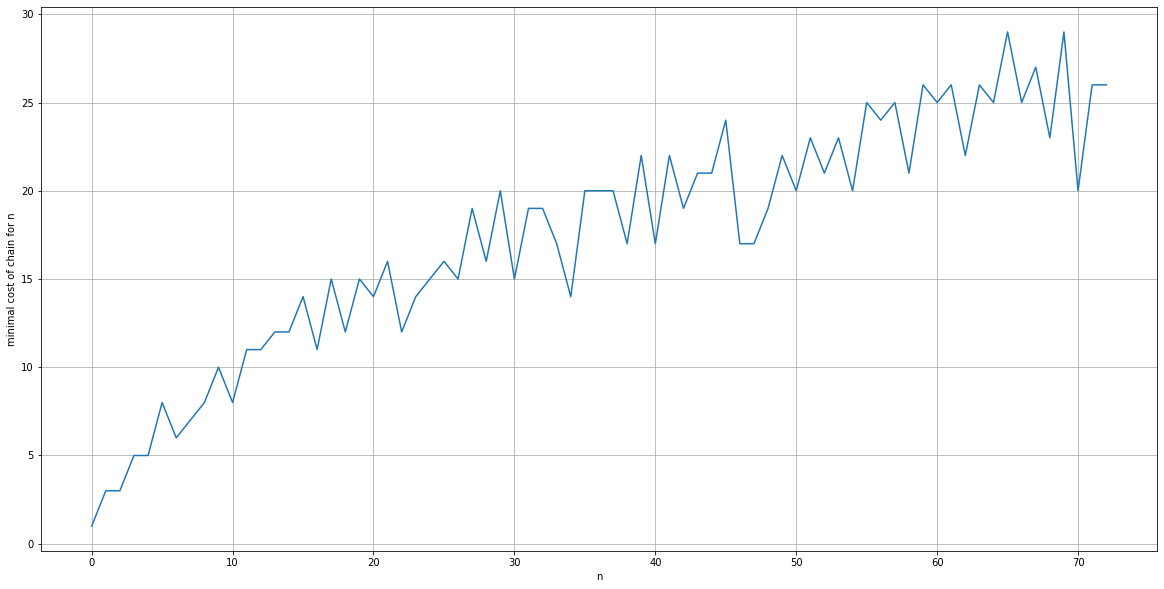

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(map( lambda item: item[0], terms)))
plt.grid(True)
plt.ylabel('minimal cost of chain for n')
plt.xlabel('n')

plt.show()

In [ ]:
a = 10**(10**10)
a.bit_length()